In [81]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the input vectors and the output vectors associated with them

In [82]:
ps = np.zeros([8, 15])
ts = np.zeros([8, 3])
ps[0] = np.array([
    -1, 1, -1, 
    1, -1, 1, 
    1, 1, 1, 
    1, -1, 1, 
    1, -1, 1
])
ts[0] = np.array([-1, -1, -1])
ps[1] = np.array([
    1, 1, -1, 
    1, -1, 1,
    1, 1, -1, 
    1, -1, 1, 
    1, 1, -1
])
ts[1] = np.array([-1, -1, 1])
ps[2] = np.array([
    -1, 1, 1, 
    1, -1, -1,
    1, -1, -1,
    1, -1, -1, 
    -1, 1, 1
])
ts[2] = np.array([-1, 1, -1])
ps[3] = np.array([
    1, 1, -1, 
    1, -1, 1,
    1, -1, 1,
    1, -1, 1,
    1, 1, -1
])
ts[3] = np.array([-1, 1, 1])
ps[4] = np.array([
    1, 1, 1, 
    1, -1, -1, 
    1, 1, -1, 
    1, -1, -1, 
    1, 1, 1
])
ts[4] = np.array([1, -1, -1])
ps[5] = np.array([
    1, 1, 1, 
    1, -1, -1, 
    1, 1, -1, 
    1, -1, -1,
    1, -1, -1
])
ts[5] = np.array([1, -1, 1])
ps[6] = np.array([
    -1, 1, 1, 
    1, -1, -1, 
    1, -1, 1, 
    1, -1, 1, 
    -1, 1, 1
])
ts[6] = np.array([1, 1, -1])
ps[7] = np.array([
    1, -1, 1, 
    1, -1, 1, 
    1, 1, 1, 
    1, -1, 1, 
    1, -1, 1
])
ts[7] = np.array([1, 1, 1])

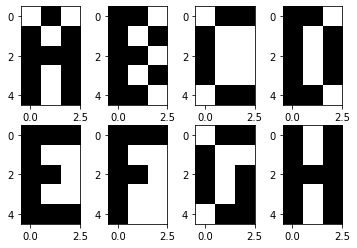

In [83]:
fig, axs = plt.subplots(2, 4)
for i in range(2):
    for j in range(4):
        axs[i][j].imshow(ps[4*i + j].reshape(5, 3), cmap=plt.cm.gray_r)

In [84]:
def init_weights(ps, ts):
    weights = np.zeros([ps.shape[1], ts.shape[1]])
    for p in range(ps.shape[0]):
        a = ps[p]
        b = ts[p]
        a = np.expand_dims(a, 1)
        b = np.expand_dims(b, 0)
        weights += np.matmul(a, b)
    return weights

In [85]:
def add_noise(a, prob):
    a = a.copy()
    choices = np.random.choice(np.arange(a.shape[0]), size=int(prob*a.shape[0]), replace=False)
    for choice in choices:
        a[choice] *= -1
    return a

In [86]:
def activate(a, theta=0):
    if a > theta:
        return 1
    else: 
        return -1
activate = np.vectorize(activate)

In [87]:
def predict(input_vec, weights):
    x = np.zeros(weights.shape[0])
    y = np.zeros(weights.shape[1])
    history_x = np.zeros_like(x)
    history_y = np.zeros_like(y)
    x = input_vec.copy()
    converged = False
    while not converged:
        y = np.matmul(np.expand_dims(x, 0), weights).squeeze(0)
        y = activate(y)
        x = np.matmul(np.expand_dims(y, 0), weights.T).squeeze(0)
        x = activate(x)
        if (x == history_x).all() and (y == history_y).all():
            converged = True
        history_x = x
        history_y = y
    return history_x, history_y

In [104]:
def predict_r(input_vec, weights):
    x = np.zeros(weights.shape[0])
    y = np.zeros(weights.shape[1])
    history_x = np.zeros_like(x)
    history_y = np.zeros_like(y)
    y = input_vec.copy()
    converged = False
    while not converged:
        x = np.matmul(np.expand_dims(y, 0), weights.T).squeeze(0)
        x = activate(x)
        y = np.matmul(np.expand_dims(x, 0), weights).squeeze(0)
        y = activate(y)
        if (x == history_x).all() and (y == history_y).all():
            converged = True
        history_x = x
        history_y = y
    return history_x, history_y

In [105]:
weights = init_weights(ps[:3, :], ts[:3, :])

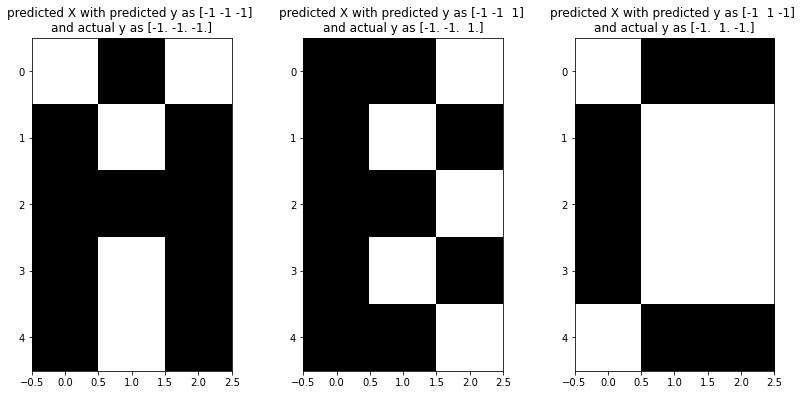

In [106]:
fig, axs = plt.subplots(1, 3, figsize=[12, 8])
for i in range(3):
    history_x, history_y = predict(ps[i], weights)
    axs[i].imshow(history_x.reshape(5, 3), cmap=plt.cm.gray_r)
    axs[i].set_title('predicted X with predicted y as {} \nand actual y as {}'.format(history_y, ts[i]))
plt.tight_layout(pad=5)

In [107]:
print(weights)

[[ 1. -1.  3.]
 [-3. -1. -1.]
 [ 1.  3. -1.]
 [-3. -1. -1.]
 [ 3.  1.  1.]
 [-1. -3.  1.]
 [-3. -1. -1.]
 [-1. -3.  1.]
 [ 1. -1. -1.]
 [-3. -1. -1.]
 [ 3.  1.  1.]
 [-1. -3.  1.]
 [-1. -3.  1.]
 [-1.  1.  1.]
 [-1.  1. -3.]]


In [108]:
results = np.zeros([3])
for _ in range(100):
    for i in range(3):
        input_with_noise = add_noise(ps[i], 0)
        history_x, history_y = predict(input_with_noise, weights)
        if (history_x == ps[i]).all() and (history_y == ts[i]).all():
            results[i] += 1
for i in range(3):
    print('The accuracy of the model for the {}-th word: {}'.format(i + 1, results[i] / 100))

The accuracy of the model for the 1-th word: 1.0
The accuracy of the model for the 2-th word: 1.0
The accuracy of the model for the 3-th word: 1.0


### Checking the results with noise added to the input vectors

In [109]:
results = np.zeros([3])
for _ in range(100):
    for i in range(3):
        input_with_noise = add_noise(ps[i], .1)
        history_x, history_y = predict(input_with_noise, weights)
        if (history_x == ps[i]).all() and (history_y == ts[i]).all():
            results[i] += 1
for i in range(3):
    print('The accuracy of the model for the {}-th word: {}'.format(i + 1, results[i] / 100))

The accuracy of the model for the 1-th word: 1.0
The accuracy of the model for the 2-th word: 1.0
The accuracy of the model for the 3-th word: 1.0


In [110]:
results = np.zeros([3])
for _ in range(100):
    for i in range(3):
        input_with_noise = add_noise(ps[i], .4)
        history_x, history_y = predict(input_with_noise, weights)
        if (history_x == ps[i]).all() and (history_y == ts[i]).all():
            results[i] += 1
for i in range(3):
    print('The accuracy of the model for the {}-th word: {}'.format(i + 1, results[i] / 100))

The accuracy of the model for the 1-th word: 0.35
The accuracy of the model for the 2-th word: 0.24
The accuracy of the model for the 3-th word: 0.41


### Checking the reverse form of prediction

In [111]:
history_x, history_y = predict_r(np.array([0, -1, -1]), weights)

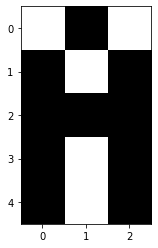

In [113]:
plt.imshow(history_x.reshape(5, 3), cmap=plt.cm.gray_r)

### Training the model on eight patterns

In [120]:
weights = init_weights(ps, ts)

In [124]:
print(weights)

[[ 2. -2.  6.]
 [-2. -2. -2.]
 [ 6.  2. -2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-4.  0.  4.]
 [ 0.  0.  0.]
 [ 2. -6.  2.]
 [ 0.  4.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-2.  2.  2.]
 [ 0. -4.  4.]
 [-2.  2. -2.]
 [ 2.  2. -6.]]


In [134]:
n_patterns = 4
weights = init_weights(ps[:n_patterns, :], ts[: n_patterns, :])
results = np.zeros([n_patterns])
for _ in range(100):
    for i in range(n_patterns):
        input_with_noise = add_noise(ps[i], 0)
        history_x, history_y = predict(input_with_noise, weights)
        if (history_x == ps[i]).all() and (history_y == ts[i]).all():
            results[i] += 1
for i in range(n_patterns):
    print('The accuracy of the model for the {}-th word: {}'.format(i + 1, results[i] / 100))

The accuracy of the model for the 1-th word: 0.0
The accuracy of the model for the 2-th word: 1.0
The accuracy of the model for the 3-th word: 1.0
The accuracy of the model for the 4-th word: 0.0


### Computing the Hamming distance between the input vectors

In [140]:
def compute_hamming_distance(a, b):
    return len(np.where(a != b)[0])

In [142]:
for i in range(8):
    for j in range(i + 1, 8):
        print('hamming distance between {}-th input vector and the {}-th input vector: {}'.format(
            i + 1, 
            j + 1,
            compute_hamming_distance(ps[i], ps[j])
        ))

hamming distance between 1-th input vector and the 2-th input vector: 4
hamming distance between 1-th input vector and the 3-th input vector: 7
hamming distance between 1-th input vector and the 4-th input vector: 4
hamming distance between 1-th input vector and the 5-th input vector: 6
hamming distance between 1-th input vector and the 6-th input vector: 6
hamming distance between 1-th input vector and the 7-th input vector: 5
hamming distance between 1-th input vector and the 8-th input vector: 3
hamming distance between 2-th input vector and the 3-th input vector: 7
hamming distance between 2-th input vector and the 4-th input vector: 2
hamming distance between 2-th input vector and the 5-th input vector: 4
hamming distance between 2-th input vector and the 6-th input vector: 4
hamming distance between 2-th input vector and the 7-th input vector: 7
hamming distance between 2-th input vector and the 8-th input vector: 5
hamming distance between 3-th input vector and the 4-th input ve

In [153]:
n_patterns = 8
weights = init_weights(ps[:n_patterns, :], ts[: n_patterns, :])
results = np.zeros([n_patterns])
for i in range(n_patterns):
    input_with_noise = add_noise(ps[i], 0)
    history_x, history_y = predict(input_with_noise, weights)
    results[i] = len(np.where(history_x == ps[i])[0])
for i in range(n_patterns):
    print('The accuracy of the model for the {}-th word: {}'.format(i + 1, np.round(results[i] / 15, 3)))

The accuracy of the model for the 1-th word: 0.6
The accuracy of the model for the 2-th word: 0.733
The accuracy of the model for the 3-th word: 0.667
The accuracy of the model for the 4-th word: 0.667
The accuracy of the model for the 5-th word: 0.6
The accuracy of the model for the 6-th word: 0.733
The accuracy of the model for the 7-th word: 0.667
The accuracy of the model for the 8-th word: 0.533
